In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

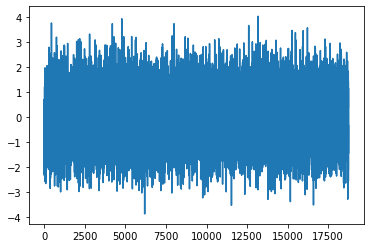

In [144]:
T = 375 * 50
n = 10
q = n/T
synthetic_returns = np.random.normal(0, 1, size=(n, T))
plt.plot(synthetic_returns[1, :])

In [145]:
corr_coef = np.corrcoef(synthetic_returns)
corr_coef

array([[ 1.00000000e+00, -5.75371016e-04, -5.69548252e-03,
        -7.80810741e-04, -8.39288155e-03,  4.51051579e-03,
        -5.88881227e-04,  2.73857157e-03,  8.19602616e-03,
         9.80533125e-03],
       [-5.75371016e-04,  1.00000000e+00, -1.38505462e-03,
        -1.20698534e-03, -1.04523888e-02, -6.72988272e-03,
        -4.46649620e-03, -7.55568379e-03,  2.32229141e-03,
        -3.76974511e-03],
       [-5.69548252e-03, -1.38505462e-03,  1.00000000e+00,
         1.68155568e-03,  8.70864065e-03,  4.25335502e-03,
        -1.79227246e-02,  1.16397951e-04,  1.95588142e-03,
        -1.17168228e-02],
       [-7.80810741e-04, -1.20698534e-03,  1.68155568e-03,
         1.00000000e+00, -2.05048237e-03,  1.37640270e-02,
         8.07220270e-03, -7.93867691e-03,  3.51212660e-03,
        -1.57419652e-02],
       [-8.39288155e-03, -1.04523888e-02,  8.70864065e-03,
        -2.05048237e-03,  1.00000000e+00, -1.90777841e-03,
        -3.58545917e-03,  8.02159123e-03,  4.10228736e-03,
         1.

In [146]:
emp_cov_mat = np.matmul(synthetic_returns, synthetic_returns.T)/T

In [147]:
np.linalg.eig(corr_coef)[0]

array([1.03773457, 0.96487721, 1.02576893, 1.01729366, 1.00915175,
       0.97774856, 0.98183837, 0.98741236, 0.99969043, 0.99848417])

In [148]:
def get_eig_val_dist(mu, sigma, n, T, it):
    eigs = np.zeros(n * it)
    for i in range(it):
        synthetic_returns = np.random.normal(0, 0.04, size=(n, T))
        corr_coef = np.corrcoef(synthetic_returns)
        eig_vals = np.linalg.eig(corr_coef)[0]
        eigs[i * n: i * n + n] = eig_vals
    return eigs

In [149]:
mu = 0
sigma = 1
all_eigs = get_eig_val_dist(mu, sigma, n, T, 10000)

C:\Users\markm\.conda\envs\hft\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

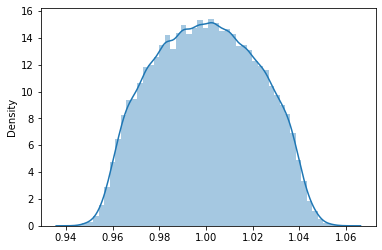

In [150]:
sns.distplot(all_eigs)

In [151]:
def s0lam(lam, q):
    lamplus = 1 + q + 2 * np.sqrt(q)
    lamminus = 1 + q - 2 * np.sqrt(q)
    # lambdas = lam[(lam> lamminus) & (lam < lamplus)]
    lambdas = lam
    print(lambdas)
    print(f"Lambda plus: {lamplus}")
    print(f"Lambda minus: {lamminus}")
    return np.divide(1/q, 2 * np.pi) * np.divide(np.sqrt((lamplus - lambdas) * (lambdas - lamminus)), lambdas)
    

[0.94243305 0.9486038  0.95477456 0.96094532 0.96711608 0.97328683
 0.97945759 0.98562835 0.99179911 0.99796986 1.00414062 1.01031138
 1.01648214 1.02265289 1.02882365 1.03499441 1.04116516 1.04733592
 1.05350668 1.05967744]
Lambda plus: 1.0467213548685033
Lambda minus: 0.9543453117981632


<ipython-input-151-712435a1307d>:9: RuntimeWarning: invalid value encountered in sqrt
  return np.divide(1/q, 2 * np.pi) * np.divide(np.sqrt((lamplus - lambdas) * (lambdas - lamminus)), lambdas)
C:\Users\markm\.conda\envs\hft\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

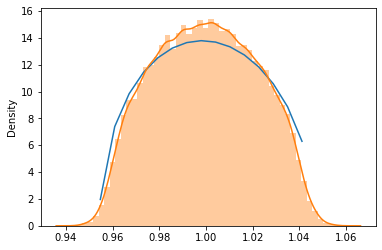

In [152]:
grid = np.linspace(np.min(all_eigs), np.max(all_eigs), 20)
plt.plot(grid, s0lam(grid, q))
sns.distplot(all_eigs)

In [153]:
grid = np.linspace(np.min(all_eigs), np.max(all_eigs), 20)

[0.94243305 0.9486038  0.95477456 0.96094532 0.96711608 0.97328683
 0.97945759 0.98562835 0.99179911 0.99796986 1.00414062 1.01031138
 1.01648214 1.02265289 1.02882365 1.03499441 1.04116516 1.04733592
 1.05350668 1.05967744]
Lambda plus: 1.0467213548685033
Lambda minus: 0.9543453117981632


<ipython-input-151-712435a1307d>:9: RuntimeWarning: invalid value encountered in sqrt
  return np.divide(1/q, 2 * np.pi) * np.divide(np.sqrt((lamplus - lambdas) * (lambdas - lamminus)), lambdas)


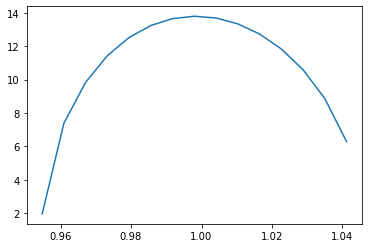

In [154]:
plt.plot(grid, s0lam(grid, q))